# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
df_hundred = pd.read_csv("roll_the_dice_hundred.csv")

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
def roll_dice_simulation(num_rolls=10, num_sides=6):
    """
    Simulate rolling a dice multiple times and save the results in a DataFrame.

    Parameters:
        num_rolls (int): The number of times to roll the dice (default is 10).
        num_sides (int): The number of sides on the dice (default is 6 for a standard dice).

    Returns:
        pandas.DataFrame: A DataFrame containing the results of the dice rolls.
    """
    dice_rolls = [random.choices(range(1, num_sides + 1), k=num_rolls) for _ in range(num_rolls)]
    df = pd.DataFrame(dice_rolls).T
    df.columns = [f"Roll_{i+1}" for i in range(num_rolls)]
    return df

In [5]:
dice_results = roll_dice_simulation()
print(dice_results)

   Roll_1  Roll_2  Roll_3  Roll_4  Roll_5  Roll_6  Roll_7  Roll_8  Roll_9  \
0       2       1       1       6       6       2       5       2       5   
1       5       5       1       2       2       4       2       4       2   
2       1       2       1       3       5       3       3       6       2   
3       3       2       3       5       2       5       1       2       3   
4       2       4       2       4       4       3       6       4       3   
5       6       6       5       4       3       2       2       6       2   
6       2       5       1       2       4       3       4       1       1   
7       1       1       5       4       2       3       4       6       1   
8       3       5       2       2       2       6       2       2       2   
9       6       2       1       1       1       2       1       5       5   

   Roll_10  
0        5  
1        5  
2        3  
3        6  
4        3  
5        5  
6        5  
7        3  
8        2  
9        5  


#### 2.- Plot the results sorted by value.

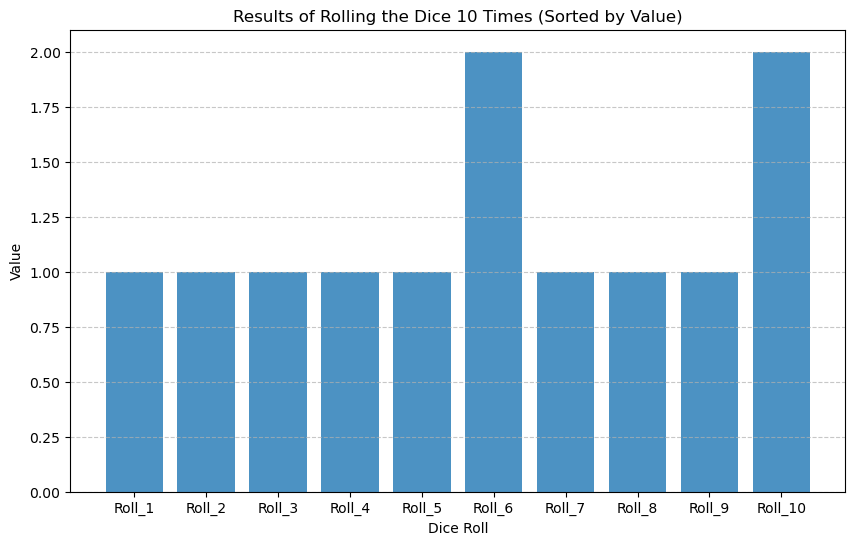

In [7]:
sorted_results = dice_results.apply(sorted, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(sorted_results.columns, sorted_results.iloc[0], align='center', alpha=0.8)
plt.xlabel('Dice Roll')
plt.ylabel('Value')
plt.title('Results of Rolling the Dice 10 Times (Sorted by Value)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

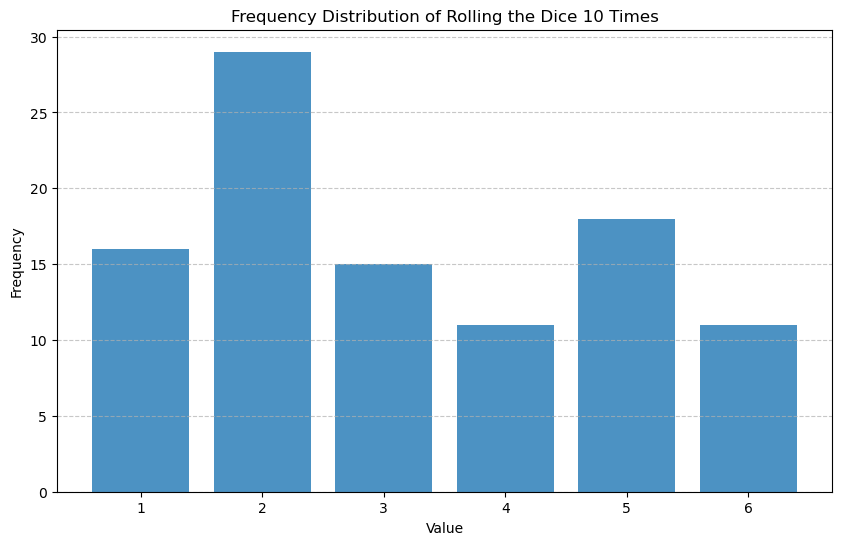

In [15]:
def roll_dice_simulation(num_rolls=10, num_sides=6):
  
 dice_results = roll_dice_simulation()


flattened_results = dice_results.values.ravel()
frequency_distribution = pd.value_counts(flattened_results).sort_index()


plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, align='center', alpha=0.8)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rolling the Dice 10 Times')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#It can be used to analyze the randomness and fairness of the dice rolls and compare the observed frequencies to the expected probabilities for a fair six-sided dice.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
def calculate_mean(data):
    """
    Calculate the mean of a given dataset.

    Parameters:
        data (list or pandas.Series): The dataset for which the mean needs to be calculated.

    Returns:
        float: The mean value of the dataset.
    """
    total_sum = 0
    num_observations = len(data)

    for value in data:
        total_sum += value

    mean = total_sum / num_observations
    return mean

In [17]:
mean_value = calculate_mean(dice_results.values.ravel())
print("Mean:", mean_value)

Mean: 3.19


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [18]:
def calculate_mean_from_frequency_distribution(freq_dist):
    """
    Calculate the mean using a frequency distribution.

    Parameters:
        freq_dist (pandas.Series): The frequency distribution of a dataset.

    Returns:
        float: The mean value calculated from the frequency distribution.
    """
    total_sum = 0
    num_observations = 0

    for value, frequency in freq_dist.items():
        total_sum += value * frequency
        num_observations += frequency

    mean = total_sum / num_observations
    return mean

mean_value = calculate_mean_from_frequency_distribution(frequency_distribution)
print("Mean calculated from frequency distribution:", mean_value)

Mean calculated from frequency distribution: 3.19


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [19]:
def calculate_median(data):
    """
    Calculate the median of a given dataset.

    Parameters:
        data (list or pandas.Series): The dataset for which the median needs to be calculated.

    Returns:
        float: The median value of the dataset.
    """
    sorted_data = sorted(data)
    num_observations = len(sorted_data)

    if num_observations % 2 == 0:  
        mid_idx = num_observations // 2
        median = (sorted_data[mid_idx - 1] + sorted_data[mid_idx]) / 2
    else:  
        mid_idx = num_observations // 2
        median = sorted_data[mid_idx]

    return median

In [20]:
median_value = calculate_median(dice_results.values.ravel())
print("Median:", median_value)

Median: 3.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [21]:
def calculate_quartiles(data):
    """
    Calculate the four quartiles of a given dataset.

    Parameters:
        data (list or pandas.Series): The dataset for which the quartiles need to be calculated.

    Returns:
        float, float, float: The first quartile (Q1), median (Q2 or Q2 and Q3 for odd and even lengths, respectively),
        and the third quartile (Q3) of the dataset.
    """
    sorted_data = sorted(data)
    num_observations = len(sorted_data)

    if num_observations % 2 == 0: 
        mid_idx = num_observations // 2
        Q2 = (sorted_data[mid_idx - 1] + sorted_data[mid_idx]) / 2
        lower_half = sorted_data[:mid_idx]
        upper_half = sorted_data[mid_idx:]
    else:  
        mid_idx = num_observations // 2
        Q2 = sorted_data[mid_idx]
        lower_half = sorted_data[:mid_idx]
        upper_half = sorted_data[mid_idx + 1:]

    Q1 = calculate_median(lower_half)
    Q3 = calculate_median(upper_half)

    return Q1, Q2, Q3


In [22]:
Q1, median, Q3 = calculate_quartiles(dice_results.values.ravel())
print("Q1:", Q1)
print("Median (Q2):", median)
print("Q3:", Q3)

Q1: 2.0
Median (Q2): 3.0
Q3: 5.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

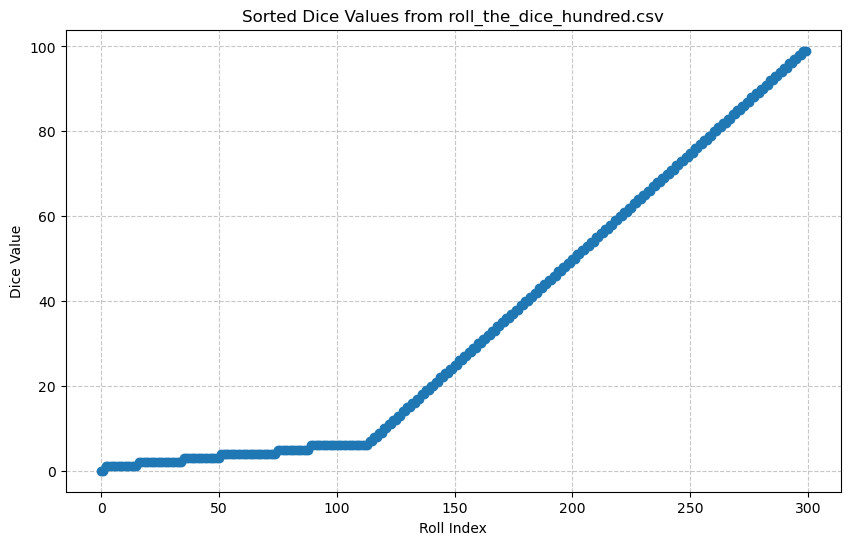

In [25]:
df_hundred = pd.read_csv("roll_the_dice_hundred.csv")

sorted_values = np.sort(df_hundred.values.ravel())
plt.figure(figsize=(10, 6))
plt.plot(sorted_values, marker='o', linestyle='-')
plt.xlabel('Roll Index')
plt.ylabel('Dice Value')
plt.title('Sorted Dice Values from roll_the_dice_hundred.csv')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#the grid lines are enabled to help visualize the data points more clearly

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [26]:
frequency_distribution = df_hundred.apply(pd.value_counts).fillna(0).astype(int)


flattened_freq_dist = frequency_distribution.values.ravel()


def calculate_mean_from_frequency_distribution(freq_dist):
   

 mean_value = calculate_mean_from_frequency_distribution(flattened_freq_dist)
print("Mean value of the hundred dice rolls:", mean_value)

Mean value of the hundred dice rolls: 3.19


#### 3.- Now, calculate the frequency distribution.


In [27]:
frequency_distribution = df_hundred.apply(pd.value_counts).fillna(0).astype(int)


print("Frequency Distribution:")
print(frequency_distribution)

Frequency Distribution:
    Unnamed: 0  roll  value
0            1     1      0
1            1     1     12
2            1     1     17
3            1     1     14
4            1     1     22
..         ...   ...    ...
95           1     1      0
96           1     1      0
97           1     1      0
98           1     1      0
99           1     1      0

[100 rows x 3 columns]


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

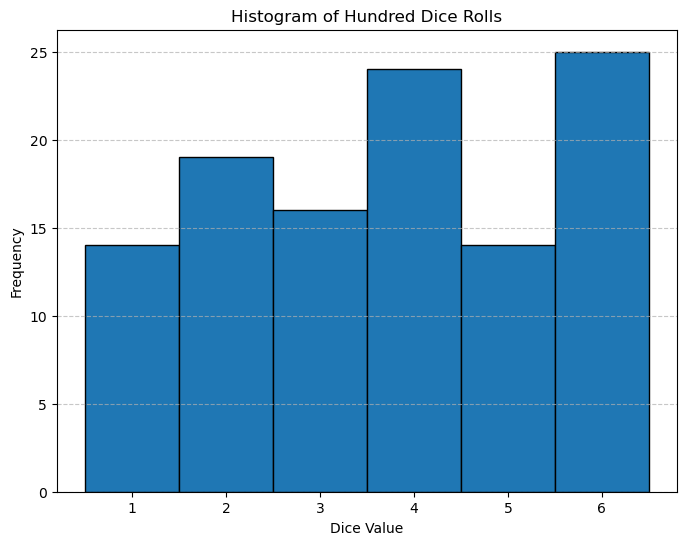

In [28]:
frequency_distribution = df_hundred.apply(pd.value_counts).fillna(0).astype(int)


plt.figure(figsize=(8, 6))
plt.hist(df_hundred.values.ravel(), bins=6, range=(0.5, 6.5), edgecolor='black', align='mid')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Histogram of Hundred Dice Rolls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 7))
plt.show()

In [ ]:
#This means that each value (1 to 6) should occur with roughly the same frequency.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

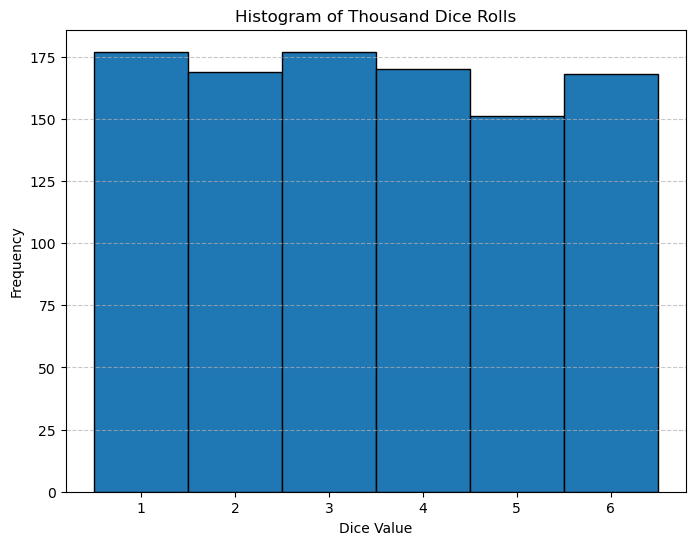

In [29]:
df_thousand = pd.read_csv("roll_the_dice_thousand.csv")

frequency_distribution_thousand = df_thousand.apply(pd.value_counts).fillna(0).astype(int)


plt.figure(figsize=(8, 6))
plt.hist(df_thousand.values.ravel(), bins=6, range=(0.5, 6.5), edgecolor='black', align='mid')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Histogram of Thousand Dice Rolls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 7))
plt.show()

In [ ]:
#The values are similar in frequency 

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [33]:
df_ages = pd.read_csv("ages_population.csv")


print(df_ages.head())

   observation
0         68.0
1         12.0
2         45.0
3         38.0
4         49.0


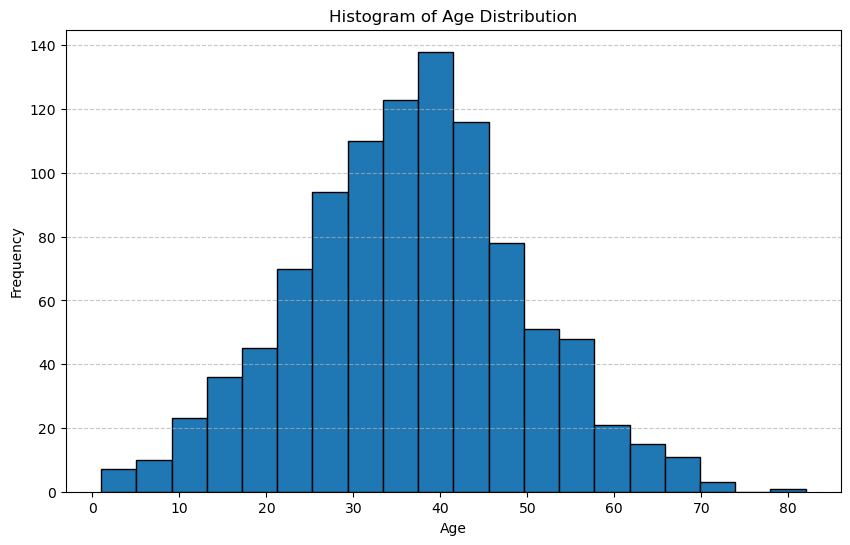

In [34]:
frequency_distribution_ages = df_ages['observation'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.hist(df_ages['observation'], bins=20, edgecolor='black', align='mid')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [35]:
mean_age = df_ages['observation'].mean()
std_dev_age = df_ages['observation'].std()


print("Mean age:", mean_age)
print("Standard deviation of age:", std_dev_age)

Mean age: 36.56
Standard deviation of age: 12.816499625976762


In [ ]:
#Between 30 and 40 have a mean range guess

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [37]:
df_ages_2 = pd.read_csv("ages_population2.csv")

print(df_ages_2.columns)

Index(['observation'], dtype='object')


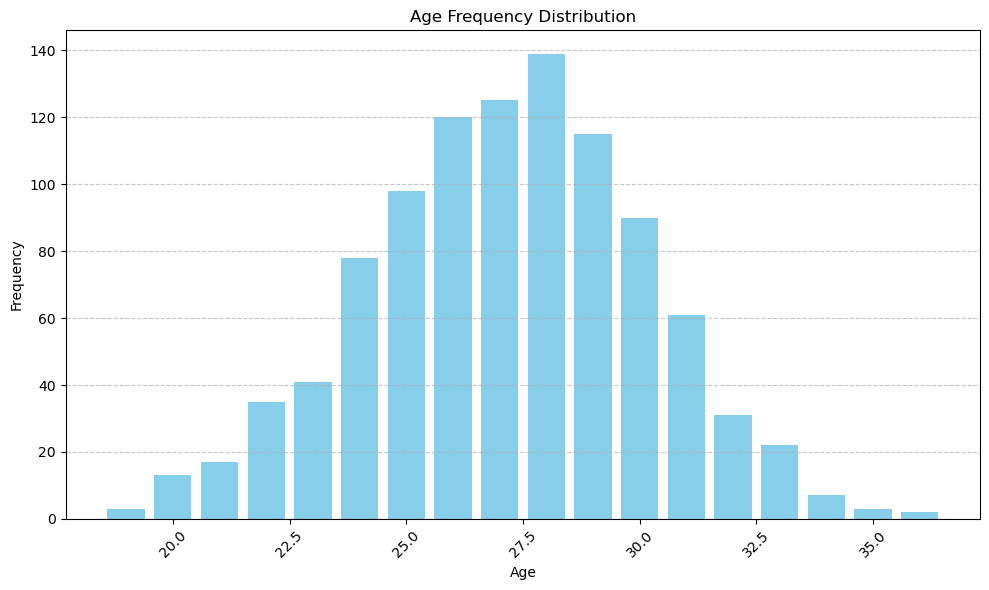

In [40]:
frequency_distribution = df_ages_2['observation'].value_counts()


frequency_distribution = frequency_distribution.sort_index()


plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
#Yes, have more frequency in another ages "example: 25, 27 , etc." 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [41]:
mean_age = df_ages_2['observation'].mean()
std_age = df_ages_2['observation'].std()

print("Mean age:", mean_age)
print("Standard deviation of age:", std_age)

Mean age: 27.155
Standard deviation of age: 2.969813932689186


In [ ]:
#have a less mean and Standard deviation

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [42]:
df_ages_3 = pd.read_csv("ages_population3.csv")

In [45]:
print(df_ages_3.columns)

Index(['observation'], dtype='object')


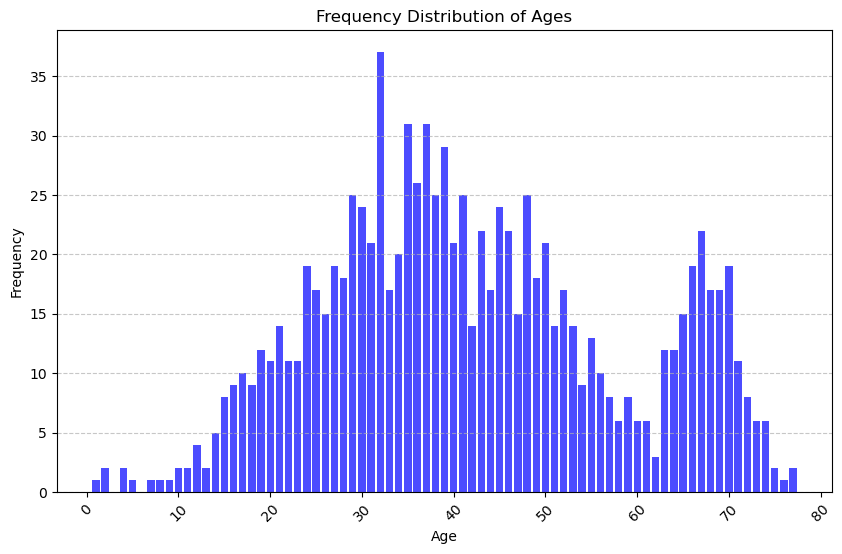

In [46]:
frequency_distribution = df_ages_3["observation"].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, width=0.8, color='b', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [47]:
mean_age = df_ages_3["observation"].mean()
std_age = df_ages_3["observation"].std()


print("Mean age:", mean_age)
print("Standard deviation of age:", std_age)


Mean age: 41.989
Standard deviation of age: 16.144705959865934


In [ ]:
#For instance, certain age groups might have been removed or modified before plotting the frequency distribution.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [48]:
quartiles = df_ages_3["observation"].quantile([0.25, 0.5, 0.75])


print("First Quartile (Q1):", quartiles[0.25])
print("Second Quartile (Q2, Median):", quartiles[0.5])
print("Third Quartile (Q3):", quartiles[0.75])

First Quartile (Q1): 30.0
Second Quartile (Q2, Median): 40.0
Third Quartile (Q3): 53.0


In [ ]:
#the values are very similar , mean and median 

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [49]:
percentiles = df_ages_3["observation"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])


print("10th Percentile:", percentiles[0.1])
print("25th Percentile:", percentiles[0.25])
print("50th Percentile (Median):", percentiles[0.5])
print("75th Percentile:", percentiles[0.75])
print("90th Percentile:", percentiles[0.9])

10th Percentile: 22.0
25th Percentile: 30.0
50th Percentile (Median): 40.0
75th Percentile: 53.0
90th Percentile: 67.0


In [ ]:
#90th Percentile are a possible outlier 

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [51]:
stats_neighborhood_1 = df_ages["observation"].describe()
stats_neighborhood_2 = df_ages_2["observation"].describe()
stats_neighborhood_3 = df_ages_3["observation"].describe()

In [52]:
quartiles_neighborhood_1 = df_ages["observation"].quantile([0.25, 0.5, 0.75])
quartiles_neighborhood_2 = df_ages_2["observation"].quantile([0.25, 0.5, 0.75])
quartiles_neighborhood_3 = df_ages_3["observation"].quantile([0.25, 0.5, 0.75])

percentiles_neighborhood_1 = df_ages["observation"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
percentiles_neighborhood_2 = df_ages_2["observation"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
percentiles_neighborhood_3 = df_ages_3["observation"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

In [53]:
print("Neighborhood 1 Statistics:")
print(stats_neighborhood_1)

print("\nNeighborhood 2 Statistics:")
print(stats_neighborhood_2)

print("\nNeighborhood 3 Statistics:")
print(stats_neighborhood_3)


print("\nQuartiles and Percentiles for Neighborhood 1:")
print(quartiles_neighborhood_1)
print(percentiles_neighborhood_1)

print("\nQuartiles and Percentiles for Neighborhood 2:")
print(quartiles_neighborhood_2)
print(percentiles_neighborhood_2)

print("\nQuartiles and Percentiles for Neighborhood 3:")
print(quartiles_neighborhood_3)
print(percentiles_neighborhood_3)

Neighborhood 1 Statistics:
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

Neighborhood 2 Statistics:
count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

Neighborhood 3 Statistics:
count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

Quartiles and Percentiles for Neighborhood 1:
0.25    28.0
0.50    37.0
0.75    45.0
Name: observation, dtype: float64
0.10    20.0
0.25    28.0
0.50    37.0
0.75    45.0
0.90    53.0
Name: observation, dtype: float64

Quartiles and Percentiles for Neighborhood 2:
0.25    25.0
0.50    27.0
0.75    29.0
Name: observation, dty

In [ ]:
#for example, in median all 3 neighborhood , dont have a half of the results 